In [291]:
# library
import matplotlib.pyplot as plt
import pandas as pd
from rake_nltk import Rake
from tika import parser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [292]:
def document_to_text(document_path):
    # document = request.FILES['document']
    parsed = parser.from_file(document_path)
    text = parsed['content']
    if parsed['content'] == None:
        print("The submitted document cannot be read.")
    try:
        text = text.replace('\n', '')
    except:
        pass
    return text

In [327]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAnassaMiller.pdf")
resume_text = document_to_text(document_path)
resume_text

"Indeed ResumeAnassa MillerBronx, NY 10455anassamiller1119_yij@indeedemail.com7189248577Highly motivated office administrator with 24 years' experience in administration and 7 yearsin the healthcare environment. High degree of efficiency and expertise in project management,communication, team leadership, customer service, problem solving and maintaining a variety oftechnology systems. \xa0• MS Office Applications, InfoEd, Rascal, ECRT and ARC/Endnote • Grant Management (Pre and Post) •Financial Administration- Accounts Management, Budgeting and Financial Reports.\xa0• Office Management and Administration • I-Buy, AP Workflow • Domestic & International TravelCoordination • Talent Acquisition & Recruiting • Excellent verbal and written communication • DataEntry and Documentation • Strategic Planning and coordinating • Establishing priorities and delegatingtasks • Motivational leadership and supervisory skills • Interpersonal with a friendly demeanor • Greattime management skills • Self M

In [293]:
def compile_document_text(text):
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    """Use this variable for production?"""
    # resume = request.FILES['document']
    """Use this variable for development"""
#     document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
#     text = document_to_text(document_path)
    data = [['resume', text]]
#     print(data)
    basic_documentdf = pd.DataFrame(data, columns = ['title', 'description'])
    return basic_documentdf

In [326]:
basic_documentdf = compile_document_text(resume_text)
basic_documentdf

,title,description
0,resume,"Indeed ResumeAnassa MillerBronx, NY 10455anass..."


In [294]:
def text_to_bagofwords(df):
    # document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
#     text = document_to_text(document_path)
#     basic_documentdf = compile_document_text(text)
    basic_documentdf['rake_key_words'] = ''
    r = Rake()
    for index, row in basic_documentdf.iterrows():
        r.extract_keywords_from_text(row['description'])
        key_words_dict_scores = r.get_word_degrees()
        row['rake_key_words'] = list(key_words_dict_scores.keys())
    # Transform key words into bag of words
    basic_documentdf['bag_of_words'] = ''
    for index, row in basic_documentdf.iterrows():
        words = ''
        words += ' '.join(row['rake_key_words']) + ' '
        row['bag_of_words'] = words
    verbose_documentdf = basic_documentdf
    return verbose_documentdf

In [325]:
verbose_documentdf = text_to_bagofwords(basic_documentdf)
verbose_documentdf

,title,description,rake_key_words,bag_of_words
0,resume,"Indeed ResumeAnassa MillerBronx, NY 10455anass...","[inpatient, preparing, laboratory, specimens, ...",inpatient preparing laboratory specimens recei...


In [295]:
def join_and_condense(df):
    # Slices
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    job_descriptions = job_descriptions.append(verbose_documentdf)
    recommend_df = job_descriptions[['title', 'bag_of_words']]
    return recommend_df

In [328]:
recommend_df = join_and_condense(verbose_documentdf)
recommend_df

,title,bag_of_words
0,training_manager,provide limited express interest additional tr...
1,training_manager,workshops including schedules integrity respon...
2,training_manager,oversee translate diverse audience advanced kn...
3,training_manager,public speaking • enjoy getting previous exper...
4,training_manager,luxury business pr teams powerpoint paced envi...
...,...,...
261,youth services aide,time position placed may apply directly locate...
262,nutritionist associate,time position local health agency professional...
263,Licensed Real Estate SalesAgent,integrity career online commission region pers...
264,Sterile Supply Tech,ged required sterilize instrument sets surgery...


In [296]:
def vectorize_text(df):
    count = CountVectorizer()
#     recommend_df = join_and_condense()
    count_matrix = count.fit_transform(recommend_df['bag_of_words'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

In [329]:
cosine_sim = vectorize_text(recommend_df)
cosine_sim

array([[1.        , 0.22157509, 0.17786577, ..., 0.19034722, 0.06270894,
        0.17370286],
       [0.22157509, 1.        , 0.24679284, ..., 0.15757982, 0.04144738,
        0.15143217],
       [0.17786577, 0.24679284, 1.        , ..., 0.16044067, 0.03114751,
        0.14472464],
       ...,
       [0.19034722, 0.15757982, 0.16044067, ..., 1.        , 0.05934326,
        0.10463757],
       [0.06270894, 0.04144738, 0.03114751, ..., 0.05934326, 1.        ,
        0.06917758],
       [0.17370286, 0.15143217, 0.14472464, ..., 0.10463757, 0.06917758,
        1.        ]])

In [336]:
def recommend_100(df, matrix):
    # document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    recommended_jobs = []
    indices = pd.Series(recommend_df['title'])
    idx = indices[indices == 'resume'].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:101].index)

    for i in top_10_indices:
        recommended_jobs.append(list(recommend_df['title'])[i])

    return recommended_jobs

In [338]:
recommended_jobs = recommend_100(recommend_df, cosine_sim)
recommend_100(recommend_df, cosine_sim)

['account_manager',
 'training_manager',
 'hr_manager',
 'Manufacturing Supervisor',
 'Protective Services Manager',
 'Admissions Coordinator',
 'fraud specialist',
 'budget_analyst',
 'Proposal Manager',
 'Program Coordinator',
 'budget_analyst',
 'Executive Director',
 'Director of Medical Specialty Clinics',
 'Security Officer',
 'document management analyst',
 'Medical Science Liaison',
 'manufacturing planner',
 'hr_manager',
 'Health Program Manager',
 'paralegal',
 'budget_analyst',
 'training_manager',
 'Field Service Representative',
 'hr_manager',
 'hr_manager',
 'Area Manager',
 'budget_analyst',
 'hr_manager',
 'dietary aide',
 'sr dietary aide',
 'fraud investigator',
 'accounts_payable_specialist',
 'hr_manager',
 'cashier',
 'hr_manager',
 'Area Manager',
 'Mental Health Worker',
 'Sales and Service Rep',
 'account_manager',
 'Safety Consultant',
 'hr_manager',
 'Missile assembly / test engineer associate',
 'plant operator',
 'Director, Alabama Math, Science and Technol

In [298]:
def format_recommendations(recommendations):
#     jobs100 = recommend_100('resume')
    jobs10 = []
    for job in recommended_jobs:
        job = job.lower().replace("_", " ").title()
        job = job.replace('Hr Manager', 'HR Manager')
        jobs10.append(job)
    jobs10 = set(jobs10[0:20])
    jobs10 = list(jobs10)
    final_jobs10 = jobs10[0:10]
    for i, item in enumerate(final_jobs10,1):
        print(i, '. ' + item + '\n', sep='',end='')
#     print(final_jobs10)    
    return final_jobs10

In [339]:
final_jobs10 = format_recommendations(recommended_jobs)
final_jobs10

1. HR Manager
2. Health Program Manager
3. Paralegal
4. Fraud Specialist
5. Account Manager
6. Proposal Manager
7. Manufacturing Planner
8. Executive Director
9. Security Officer
10. Manufacturing Supervisor


['HR Manager',
 'Health Program Manager',
 'Paralegal',
 'Fraud Specialist',
 'Account Manager',
 'Proposal Manager',
 'Manufacturing Planner',
 'Executive Director',
 'Security Officer',
 'Manufacturing Supervisor']

In [299]:
def top_100_categories(recommendations):
    df = pd.read_csv('data/job_descriptions.csv', index_col=0)
#     jobs100 = recommend_100('resume')
    user_titles = df[df.title.isin(recommended_jobs)]
    user_titles = user_titles[['title', 'category']]
    user_titles.drop_duplicates(subset="title", keep="last")
    category_list = list(user_titles.category)
    return category_list

In [344]:
category_list = top_100_categories(recommended_jobs)
category_list

['management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'customer service',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'management',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'sales & retail',
 'art, fashion & design',
 'art, fashion & design',
 'art, fashion & design',
 'art, fashion & design',
 'art, fashion & design',
 'art, fashion & des

In [342]:
def freq(list_of_categories):
    frequency = []
    # document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
#     text = document_to_text(document_path)
#     basic_documentdf = compile_document_text(text)
#     verbose_documentdf = text_to_bagofwords(basic_documentdf)
#     recommend_df = join_and_condense(verbose_documentdf)
#     cosine = vectorize_text(recommend_df)
#     title = 'resume'
#     recommended_jobs = recommend_100(document_path, title, cosine)
#     categories = top_100_categories(recommended_jobs)
    # gives set of unique words
    unique_words = set(category_list)
    for words in unique_words :
        frequency.append(category_list.count(words))
    return frequency

In [343]:
frequency = freq(category_list)
frequency

[10, 7, 15, 2, 1, 2, 43, 3, 1, 2, 5, 2, 2, 42, 1, 18, 5]

In [345]:
def viz_data(list_of_categories, frequency_of_categories):
#     categories = top_100_categories()
#     frequency = freq(categories)
    unique_words = set(category_list)
    unique_words = list(unique_words)
    category_values = dict(zip(unique_words, frequency))
    category_dict = {key:val for key, val in category_values.items() if val >= 10}
    # create data
    names=category_dict.keys()
    size=category_dict.values()
    return names, size

In [347]:
names, size = viz_data(category_list, frequency)
names, size

(dict_keys(['art, fashion & design', 'customer service', 'management', 'accounting & finance', 'sales & retail']),
 dict_values([10, 15, 43, 42, 18]))

In [348]:
def make_viz(names_of_categories, size_of_categories):
#     categories = top_100_categories()
#     freq(categories)
#     names, size = viz_data()
# Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
# Give color names
    plt.title('Strength Summary')
    plt.pie(size, labels=names)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

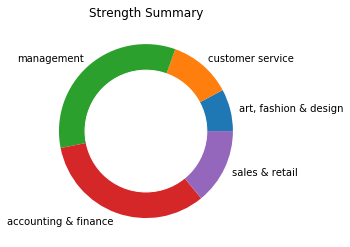

In [349]:
figure = make_viz(names, size)
figure

In [303]:
def analyze(document_path):
#     document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(document_path)
#     print(text)
#     print("Extracting text from document...")
    basic_documentdf = compile_document_text(text)
#     print(basic_documentdf)
#     print("Creating dataframe...")
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
#     print(verbose_documentdf)
#     print("Extracting key words from text...")
    recommend_df = join_and_condense(verbose_documentdf)
#     print(recommend_df)
#     print("Compiling data...")
    cosine_sim = vectorize_text(recommend_df)
#     print(cosine_sim)
#     print("Calculating similarities...")
    recommended_jobs = recommend_100('resume', cosine_sim)
#     print(recommended_jobs)
#     print("Retrieving top recommendations...")
    top10 = format_recommendations(recommended_jobs)
#     print("Formatting top recommendations...")
    category_list = top_100_categories(recommended_jobs)
#     print("Retrieving relevant job categories...")
    frequency = freq(recommended_jobs, category_list)
#     print("Calculating the most common job categories...")
    names, size = viz_data(category_list, frequency)
#     print("Compiling data...")
    strength_summary = make_viz(names, size)

In [304]:
def final_rec(document_path):
    # document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(document_path)
    basic_documentdf = compile_document_text(text)
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
    recommend_df = join_and_condense(verbose_documentdf)
    cosine_sim = vectorize_text(recommend_df)
    recommended_jobs = recommend_100(document_path, 'resume', cosine_sim)
    recommendations = format_recommendations(recommended_jobs)
    return recommendations

1. HR Manager
2. Health Program Manager
3. Paralegal
4. Fraud Specialist
5. Account Manager
6. Proposal Manager
7. Manufacturing Planner
8. Executive Director
9. Security Officer
10. Manufacturing Supervisor


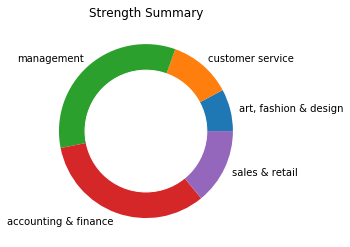

In [305]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAnassaMiller.pdf")
analyze(document_path)

1. HR Manager
2. Health Program Manager
3. Paralegal
4. Fraud Specialist
5. Account Manager
6. Proposal Manager
7. Manufacturing Planner
8. Executive Director
9. Security Officer
10. Manufacturing Supervisor


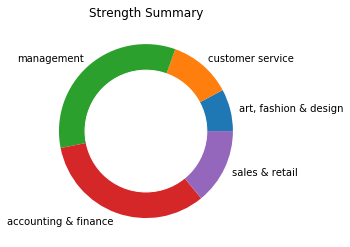

In [306]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAhmadPirzada.pdf")
analyze(document_path)

1. HR Manager
2. Health Program Manager
3. Paralegal
4. Fraud Specialist
5. Account Manager
6. Proposal Manager
7. Manufacturing Planner
8. Executive Director
9. Security Officer
10. Manufacturing Supervisor


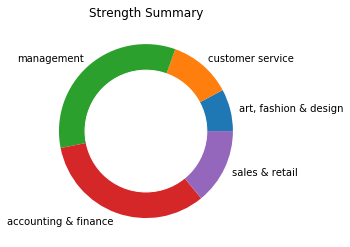

In [307]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAteliaDeaza.pdf")
analyze(document_path)

1. HR Manager
2. Health Program Manager
3. Paralegal
4. Fraud Specialist
5. Account Manager
6. Proposal Manager
7. Manufacturing Planner
8. Executive Director
9. Security Officer
10. Manufacturing Supervisor


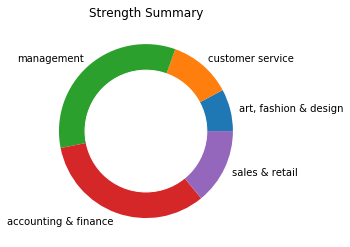

In [309]:
document_path = (r"C:\Users\sambe\Downloads\Resume.pdf")
analyze(document_path)

In [225]:
def top10(document_path):
    document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(document_path)
#     print("Extracting text from document...")
    basic_documentdf = compile_document_text(text)
#     print("Creating dataframe...")
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
#     print("Extracting key words from text...")
    recommend_df = join_and_condense(verbose_documentdf)
#     print("Compiling data...")
    cosine_sim = vectorize_text(recommend_df)
#     print("Calculating similarities...")
    recommended_jobs = recommend_100('resume', cosine_sim)
#     print("Retrieving top recommendations...")
    recommendations = format_recommendations(recommended_jobs)
    return recommendations